**1.PCA Outliers Continuous Data**

In [29]:
# Load other libraries
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()

# Make dataframe
df = pd.DataFrame(index=data.target, data=data.data, columns=data.feature_names)

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [30]:
# Import library
from pca import pca

# Initialize pca to also detected outliers.
model = pca(normalize=True, detect_outliers=['ht2', 'spe'], n_std = 2)

# Fit and transform
results = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [31]:
# Print outliers
results['outliers'].head(20)

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
0,0.982875,0.376726,21.351215,False,False,3.617239
0,0.982875,0.624371,17.438087,False,False,2.234477
0,0.982875,0.589438,17.969195,False,False,2.719789
0,0.982875,0.134454,27.028857,False,True,4.659735
0,0.982875,0.883264,12.861094,False,False,1.332104
0,0.982875,0.409352,20.793888,False,False,3.715997
0,0.982875,0.573954,18.204274,False,False,2.716305
0,0.982875,0.636355,17.255055,False,False,2.613435
0,0.982875,0.595333,17.879696,False,False,2.673452
0,0.982875,0.710599,16.096827,False,False,2.864556


[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


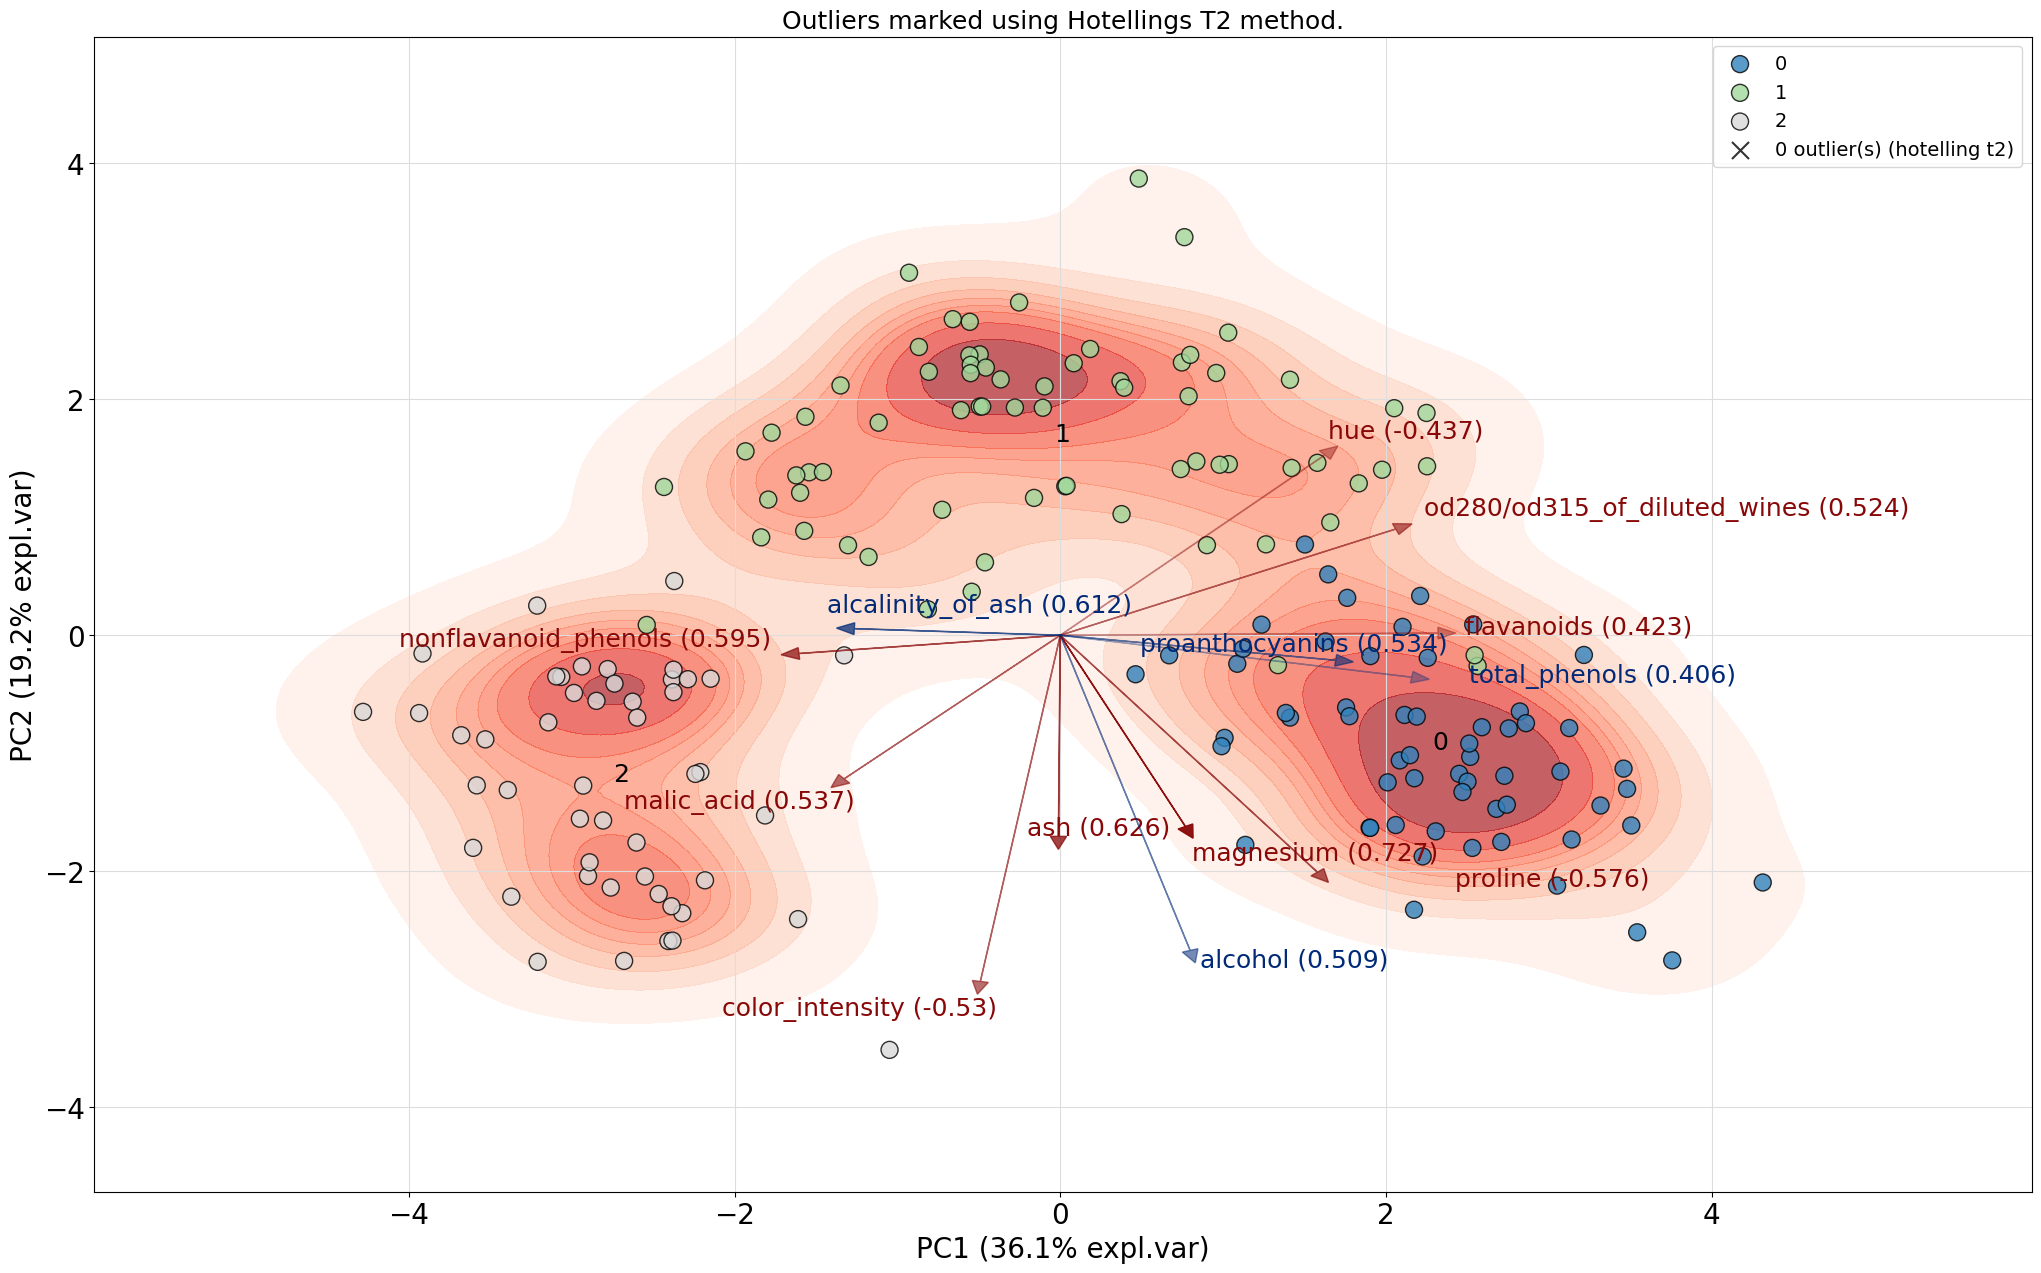

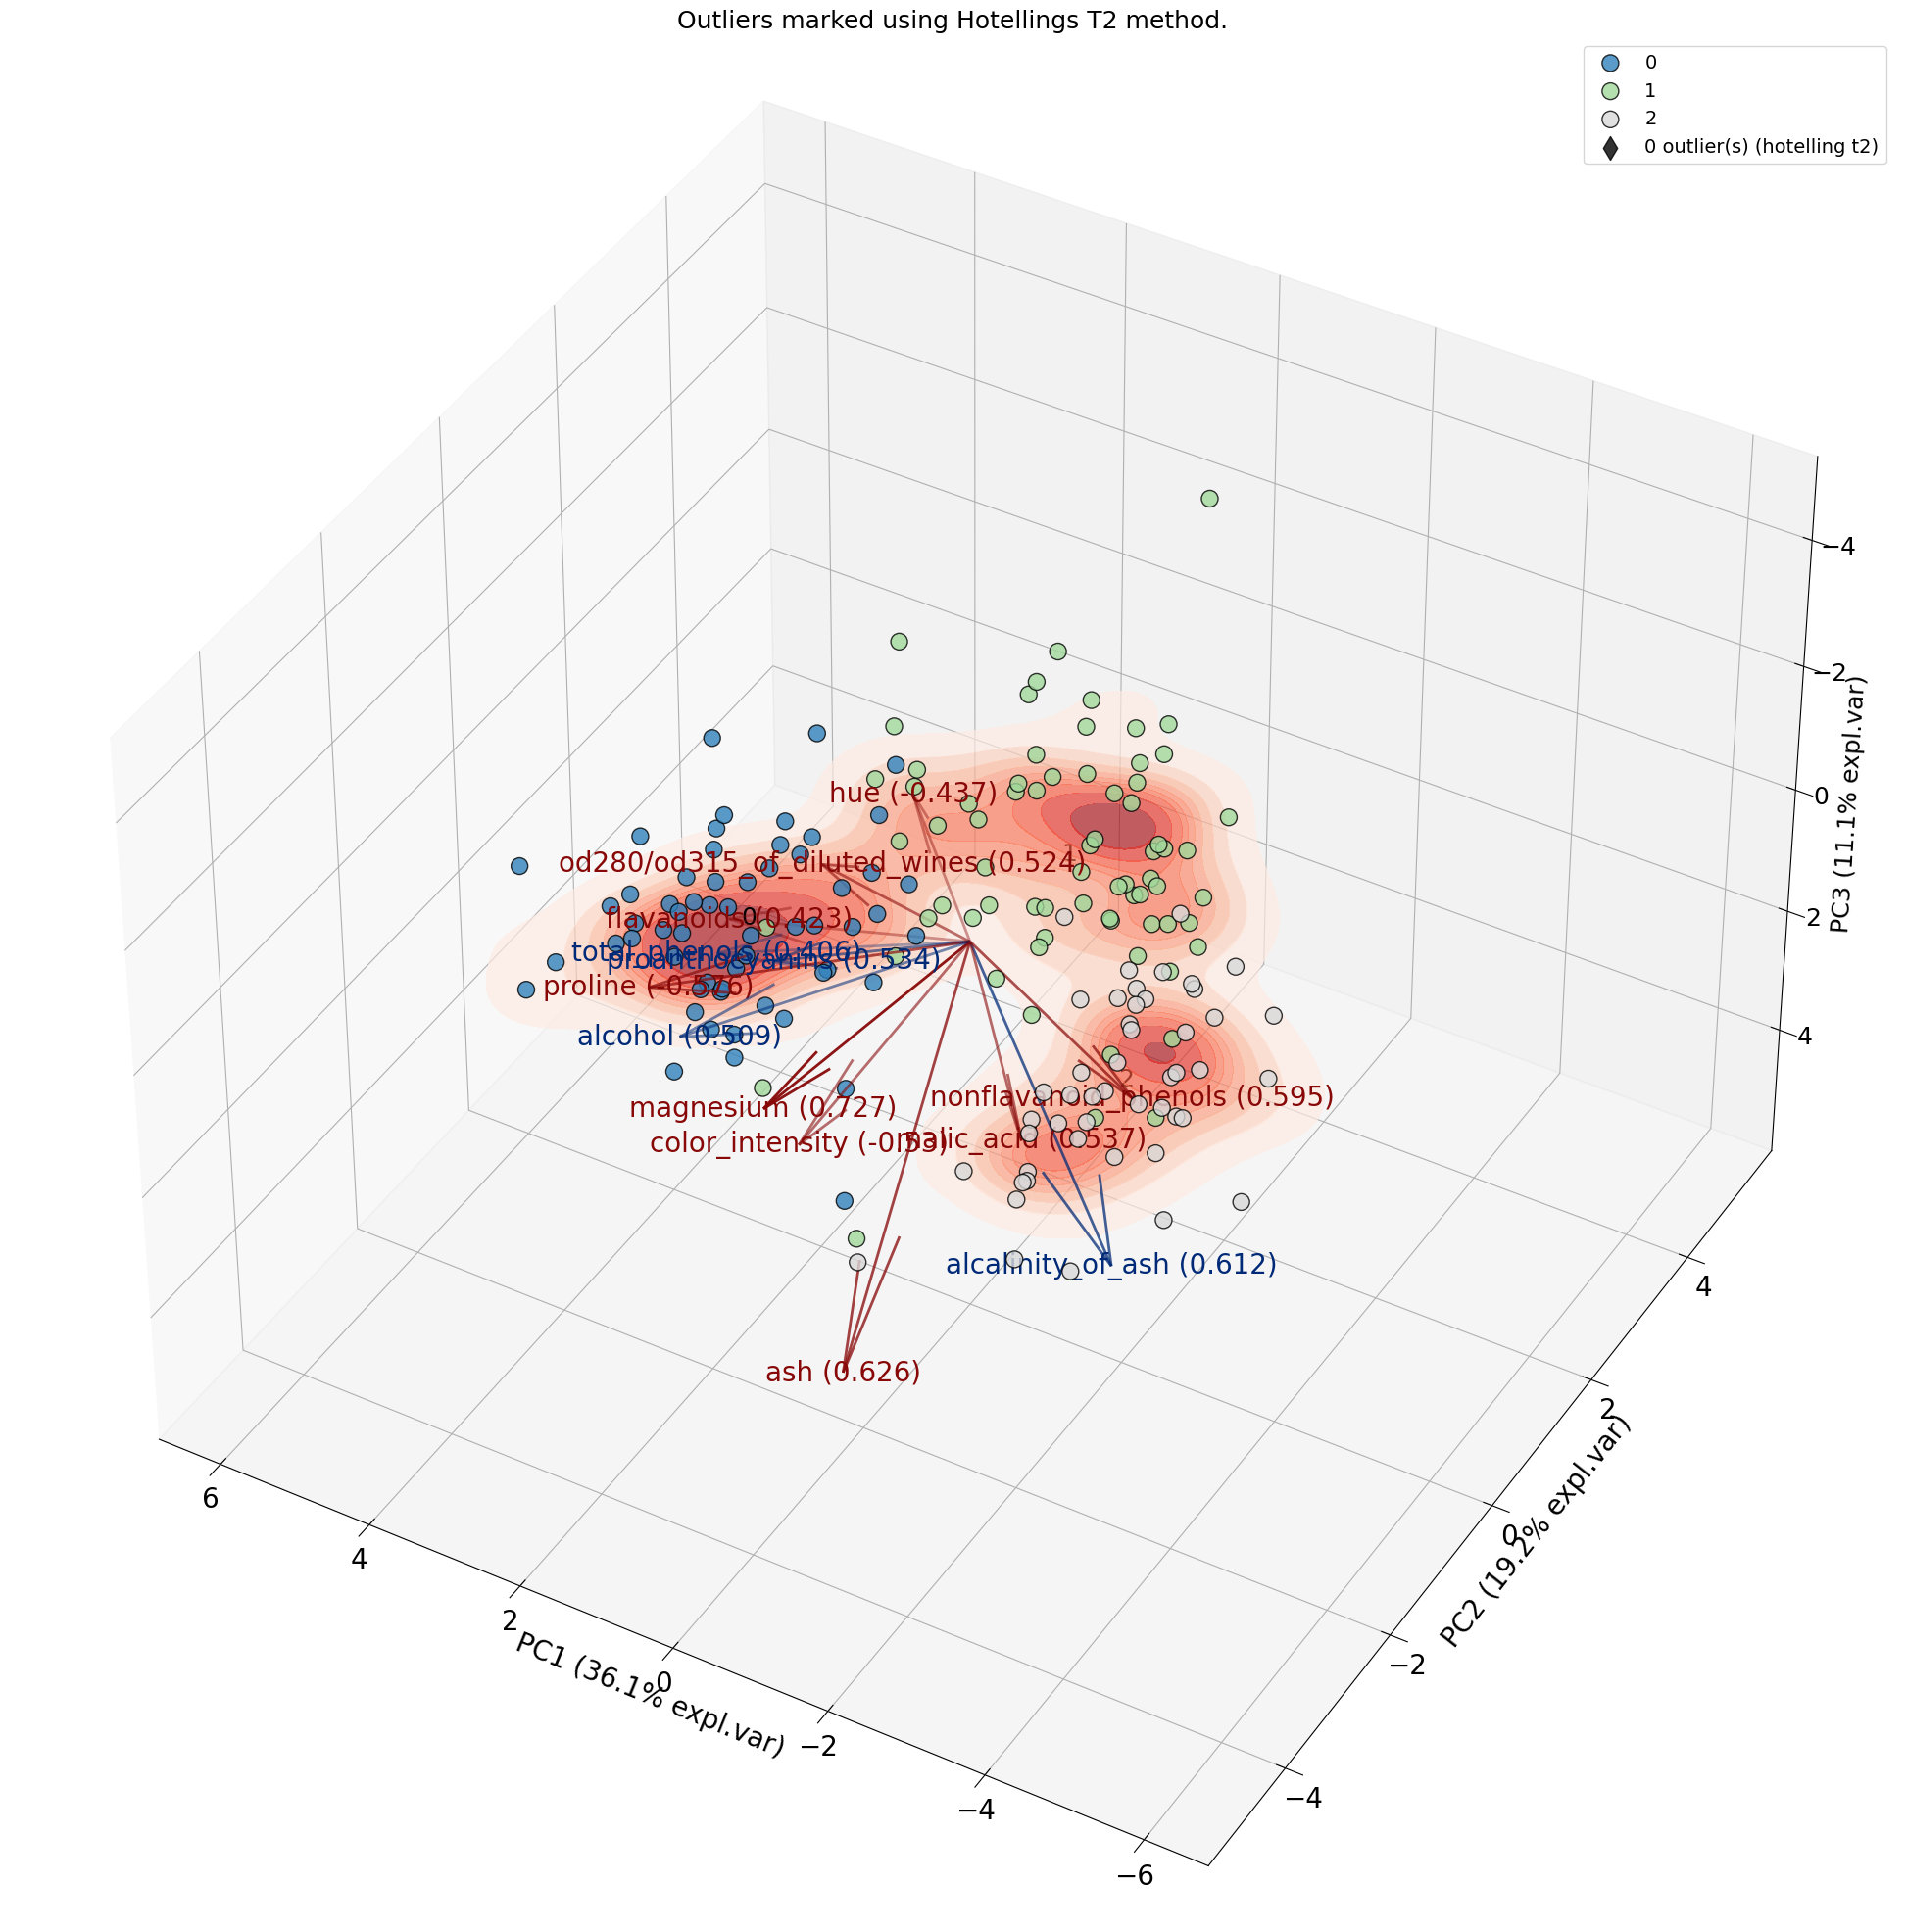

In [32]:
# Plot Hotellings T2
model.biplot(SPE=False, HT2=True, density=True, title='Outliers marked using Hotellings T2 method.')
plt.savefig('Hotellings_T2_2dplot.png', dpi=300, bbox_inches='tight')

# Make a plot in 3 dimensions
model.biplot3d(SPE=False, HT2=True, density=True, arrowdict={'scale_factor': 2.5, 'fontsize': 20}, title='Outliers marked using Hotellings T2 method.')
plt.savefig('Hotellings_T2_3dplot.png', dpi=300, bbox_inches='tight')

# Get the outliers using HT2 method.
df.loc[results['outliers']['y_bool'], :]

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


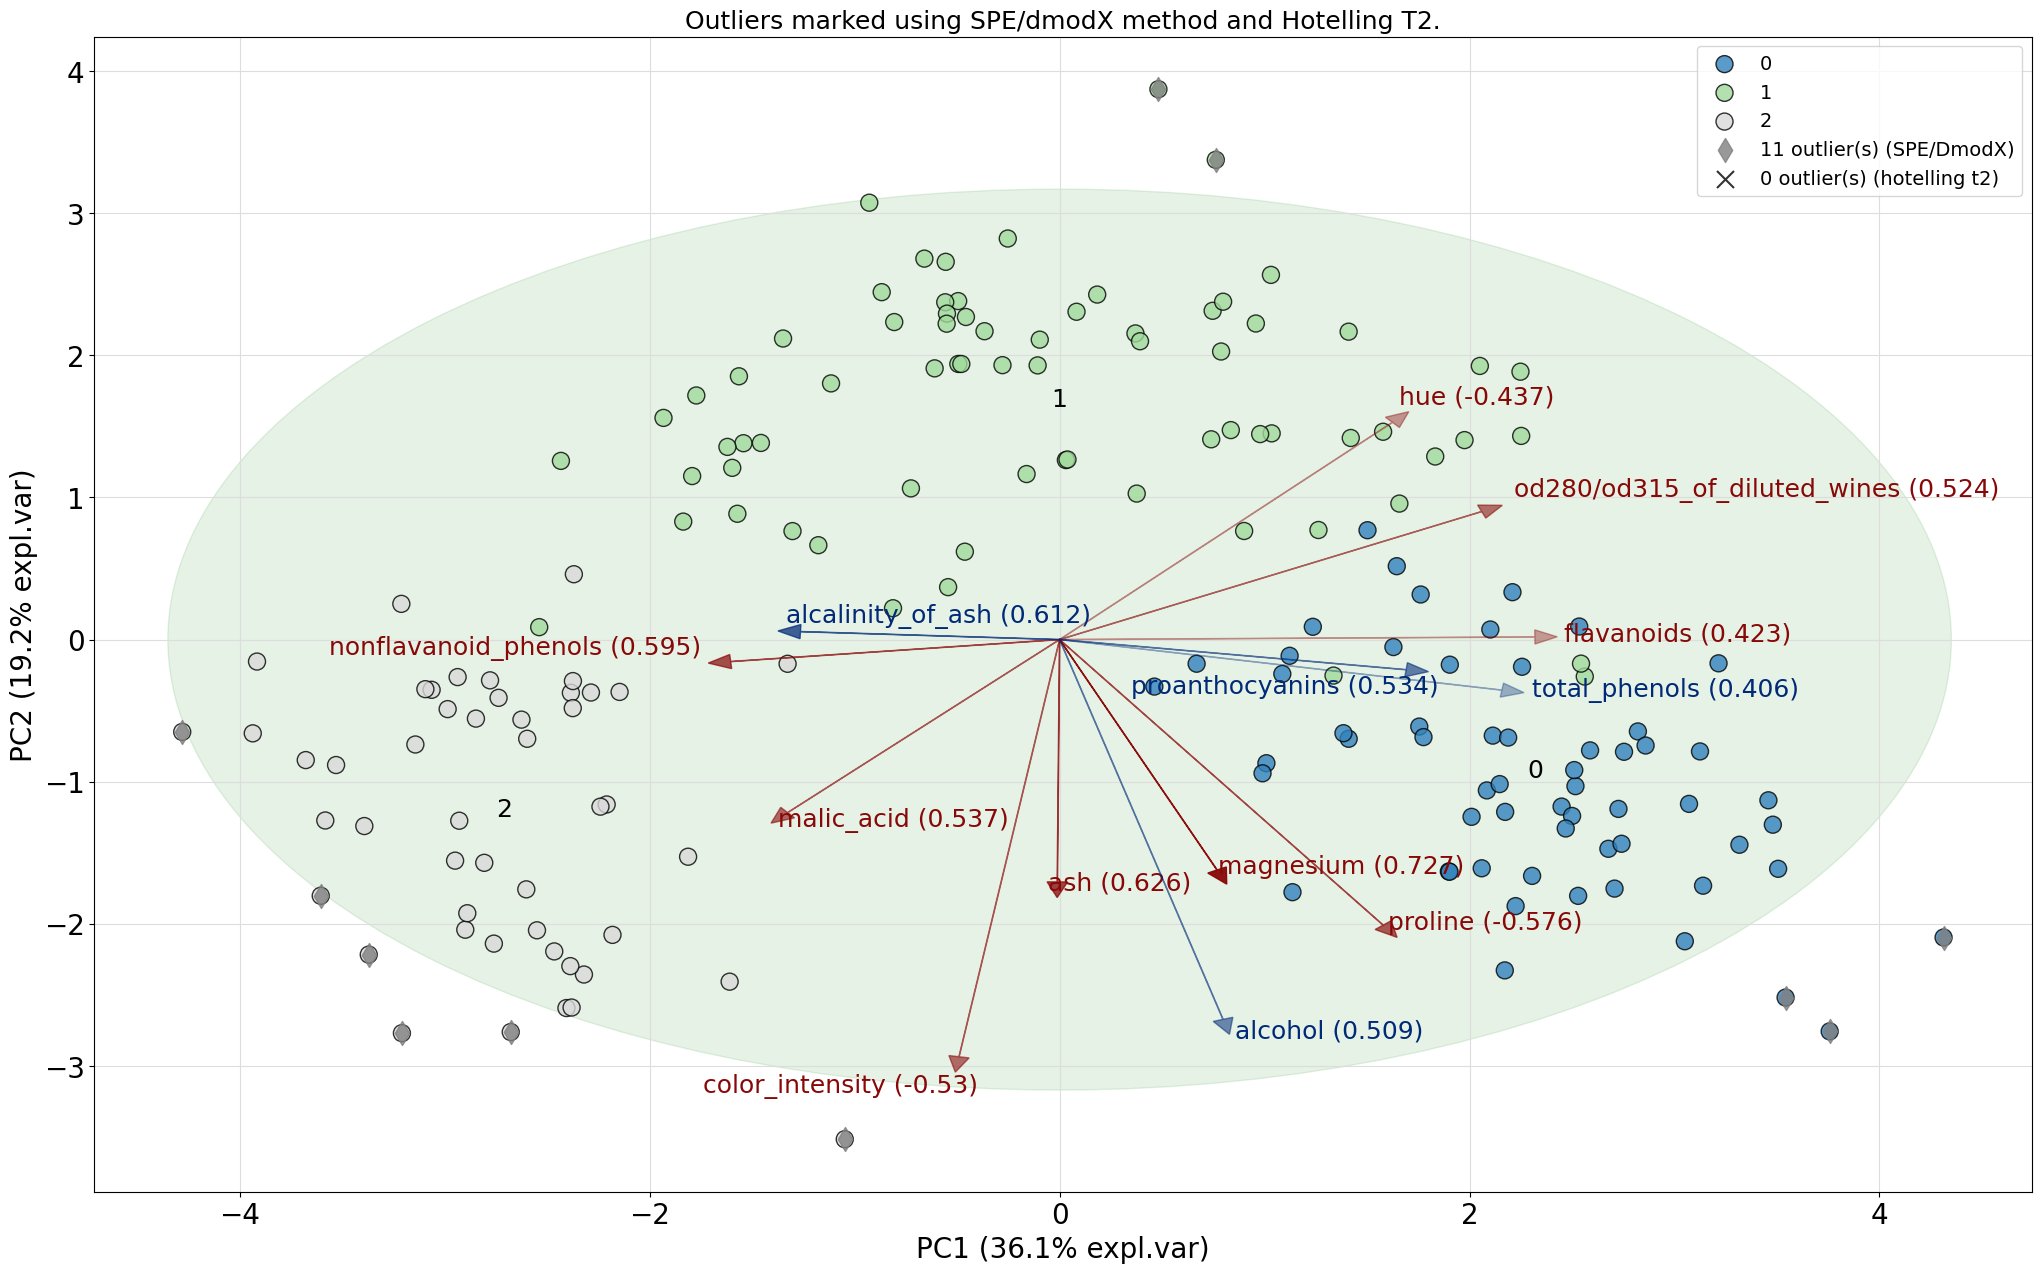

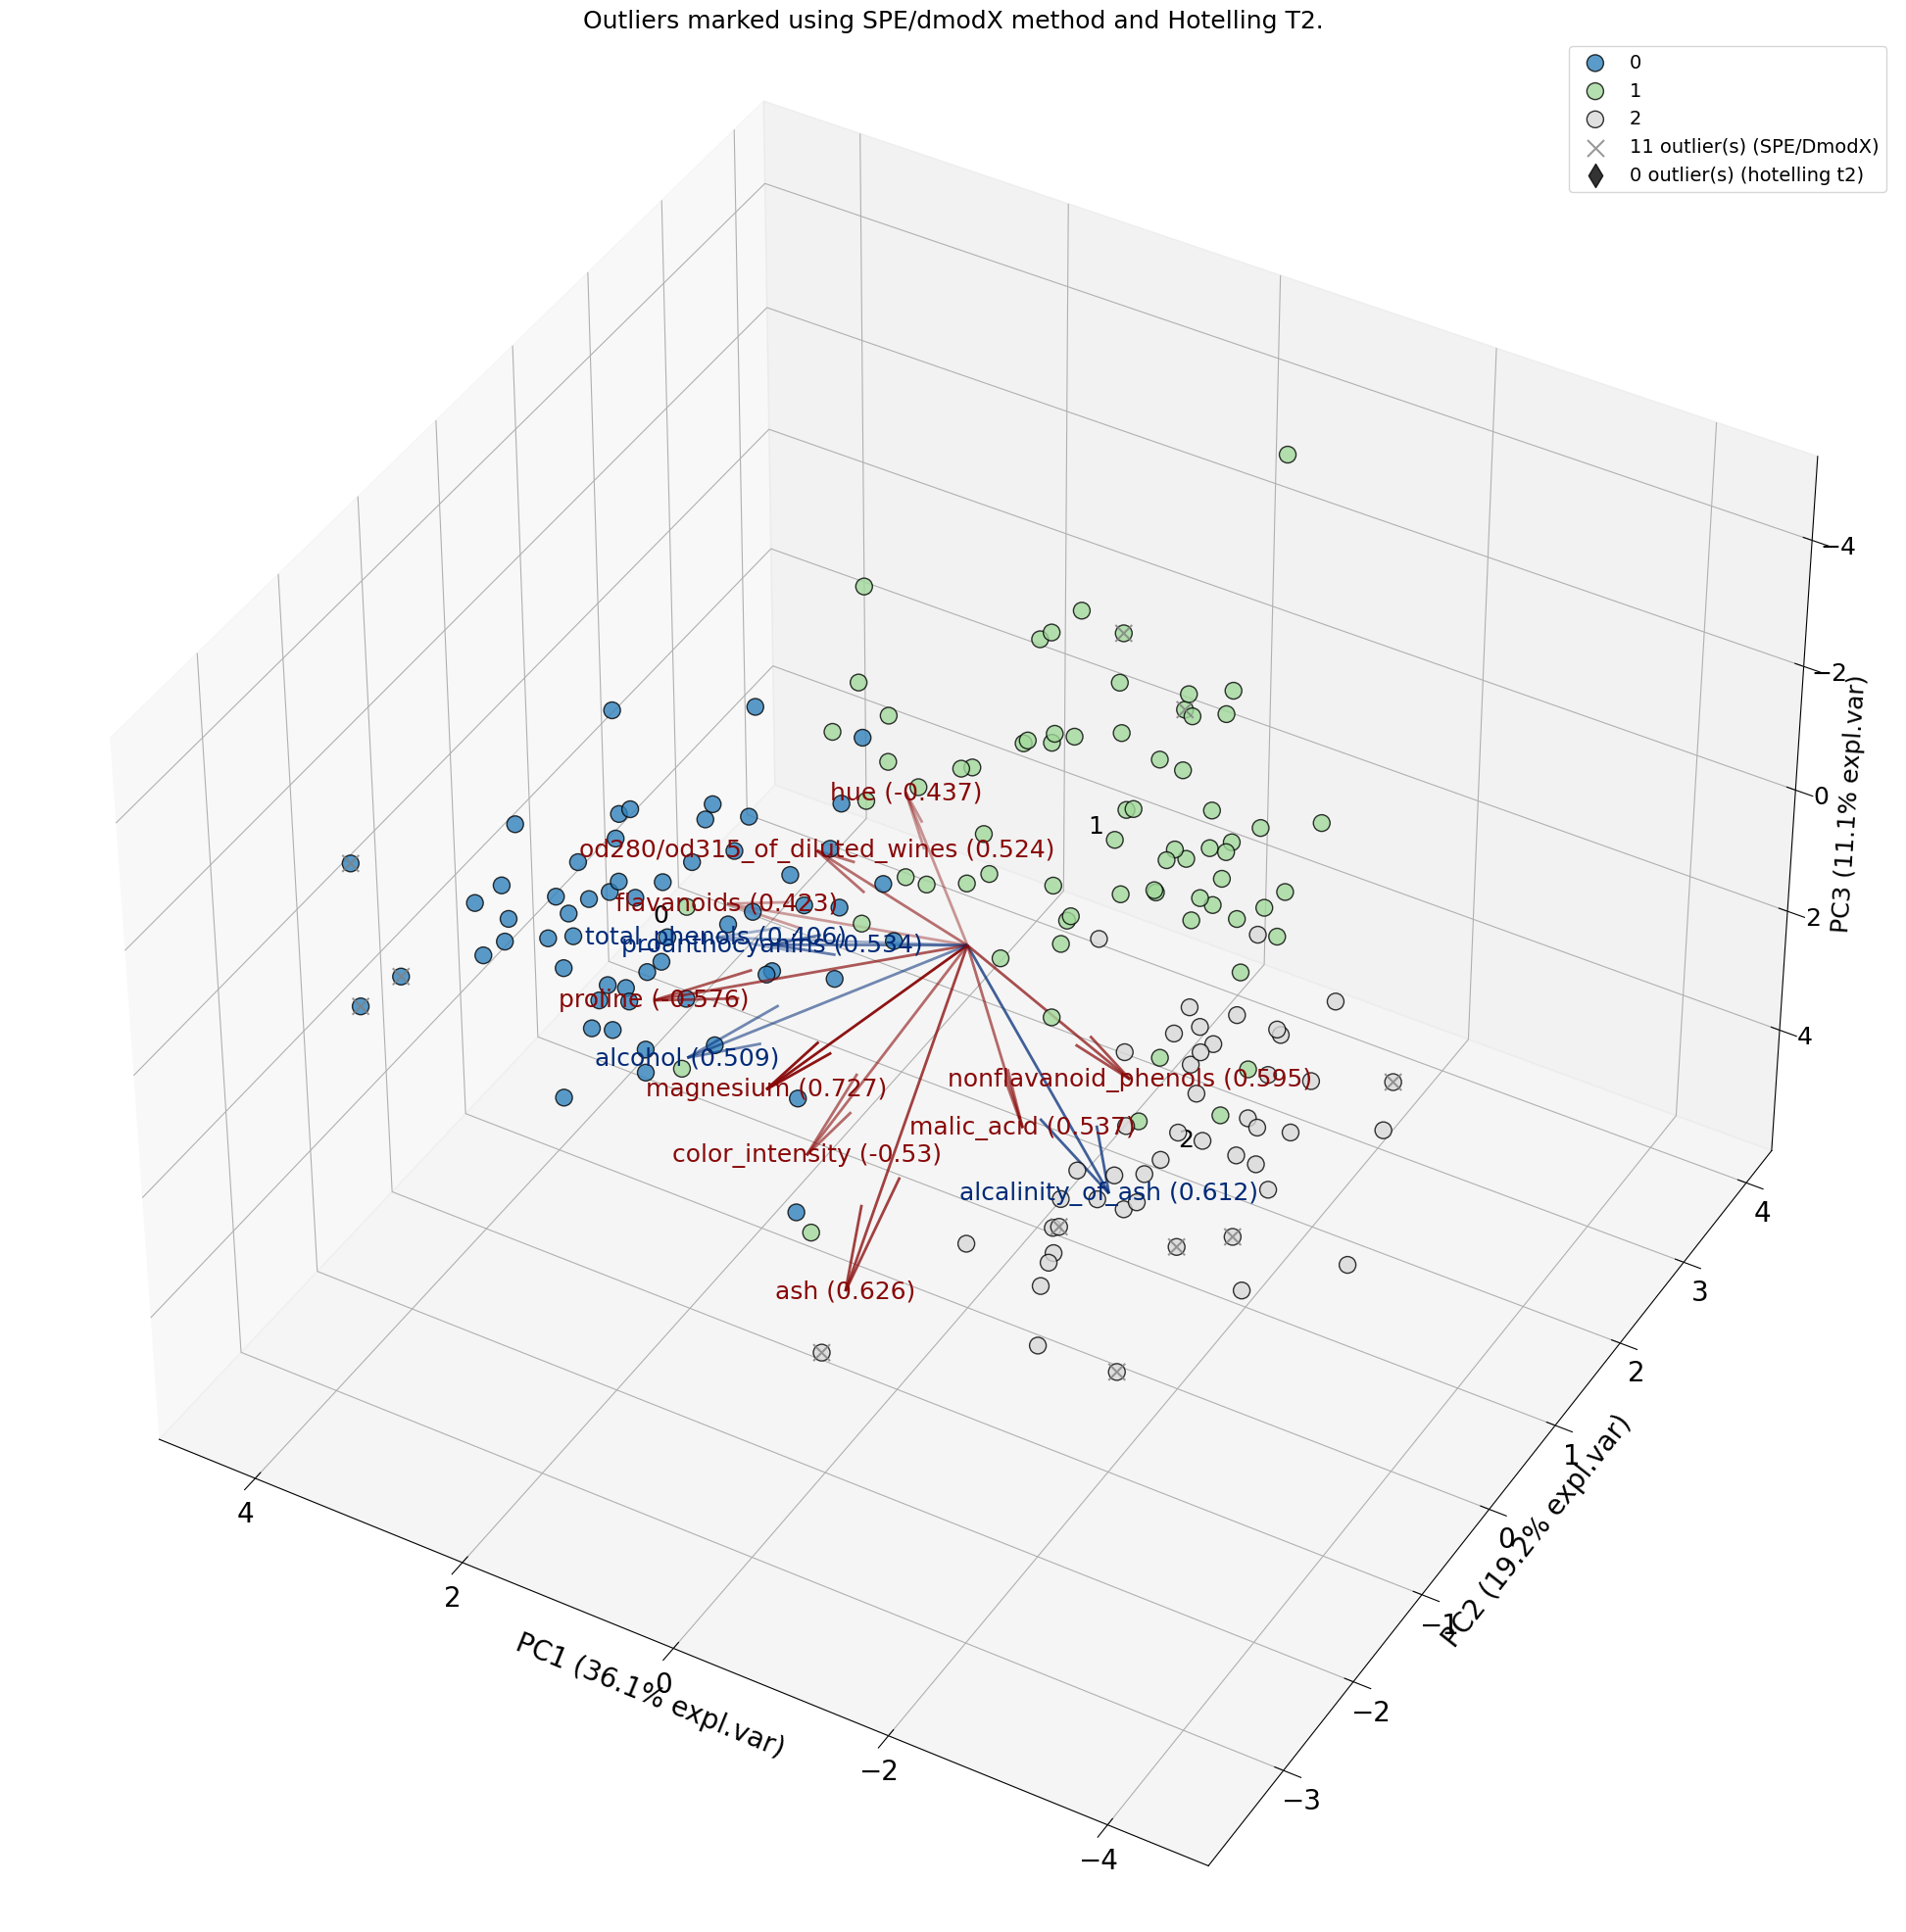

In [33]:
# Plot SPE/DmodX method
model.biplot(SPE=True, HT2=True, title='Outliers marked using SPE/dmodX method and Hotelling T2.')
plt.savefig('Hotellings_SPE_2dplot.png', dpi=300, bbox_inches='tight')

# Make a plot in 3 dimensions
model.biplot3d(SPE=True, HT2=True, title='Outliers marked using SPE/dmodX method and Hotelling T2.')

# Get the outliers using SPE/DmodX method.
outliers_df = df.loc[results['outliers']['y_bool_spe'], :]

# Export the DataFrame to a CSV file
outliers_df.to_csv('outliers_SPE_DmodX.csv', index=False)

In [34]:
# Grab overlapping outliers
I_overlap = np.logical_and(results['outliers']['y_bool'], results['outliers']['y_bool_spe'])

# Print overlapping outliers
df.loc[I_overlap, :]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


**2.PCA Outliers Categorical Data**

In [35]:
import os
if os.name == 'nt':  # Windows
    import ctypes
    is_admin = ctypes.windll.shell32.IsUserAnAdmin() != 0
    print(f"Running as administrator: {is_admin}")
else:
    print("This check is only for Windows.")

Running as administrator: True


In [36]:
# Import library
from pca import pca

# Initialize
model = pca()

# Load Student Performance data set
df = model.import_example(data='student')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [37]:
# Initialize
from df2onehot import df2onehot

# One hot encoding
df_hot = df2onehot(df)['onehot']

df_hot


[df2onehot] >Auto detecting dtypes.


100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 349.64it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 386.62it/s]

[df2onehot] >Total onehot features: 166


,school_GP,school_MS,sex_F,sex_M,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0,age_20.0,...,G3_14.0,G3_15.0,G3_16.0,G3_17.0,G3_18.0,G3_19.0,G3_6.0,G3_7.0,G3_8.0,G3_9.0
0,True,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
645,False,True,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
646,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
647,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Initialize PCA to also detected outliers.
model = pca(normalize=True,
            detect_outliers=['ht2', 'spe'],
            alpha=0.05,
            n_std=3,
            multipletests='fdr_bh')

# Fit and transform
results = model.fit_transform(df_hot)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [166] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [108] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [166] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[108]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [39]:
# Print outliers
results['outliers'].head(25)

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
0,1.000000,0.979995,175.489570,False,False,2.474177
1,1.000000,0.999955,144.000772,False,False,1.626837
2,1.000000,0.963209,180.315026,False,False,1.441923
3,1.000000,0.995338,165.800498,False,False,3.799496
4,1.000000,0.999989,138.963612,False,False,2.975654
5,1.000000,0.999634,152.656691,False,False,4.056198
6,1.000000,0.999999,129.748284,False,False,2.236290
7,1.000000,0.720186,203.455702,False,False,3.594411
8,1.000000,0.860853,193.616963,False,False,3.609387
9,1.000000,0.999793,150.147518,False,False,2.970199


In [40]:
# Overlapping outliers between both methods
overlapping_outliers = np.logical_and(results['outliers']['y_bool'],
                                      results['outliers']['y_bool_spe'])

# Show overlapping outliers
outliers_student = df.loc[overlapping_outliers]

# Export the DataFrame to a CSV file
outliers_student.to_csv('outliers_student_SPE_DmodX.csv', index=False)

[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


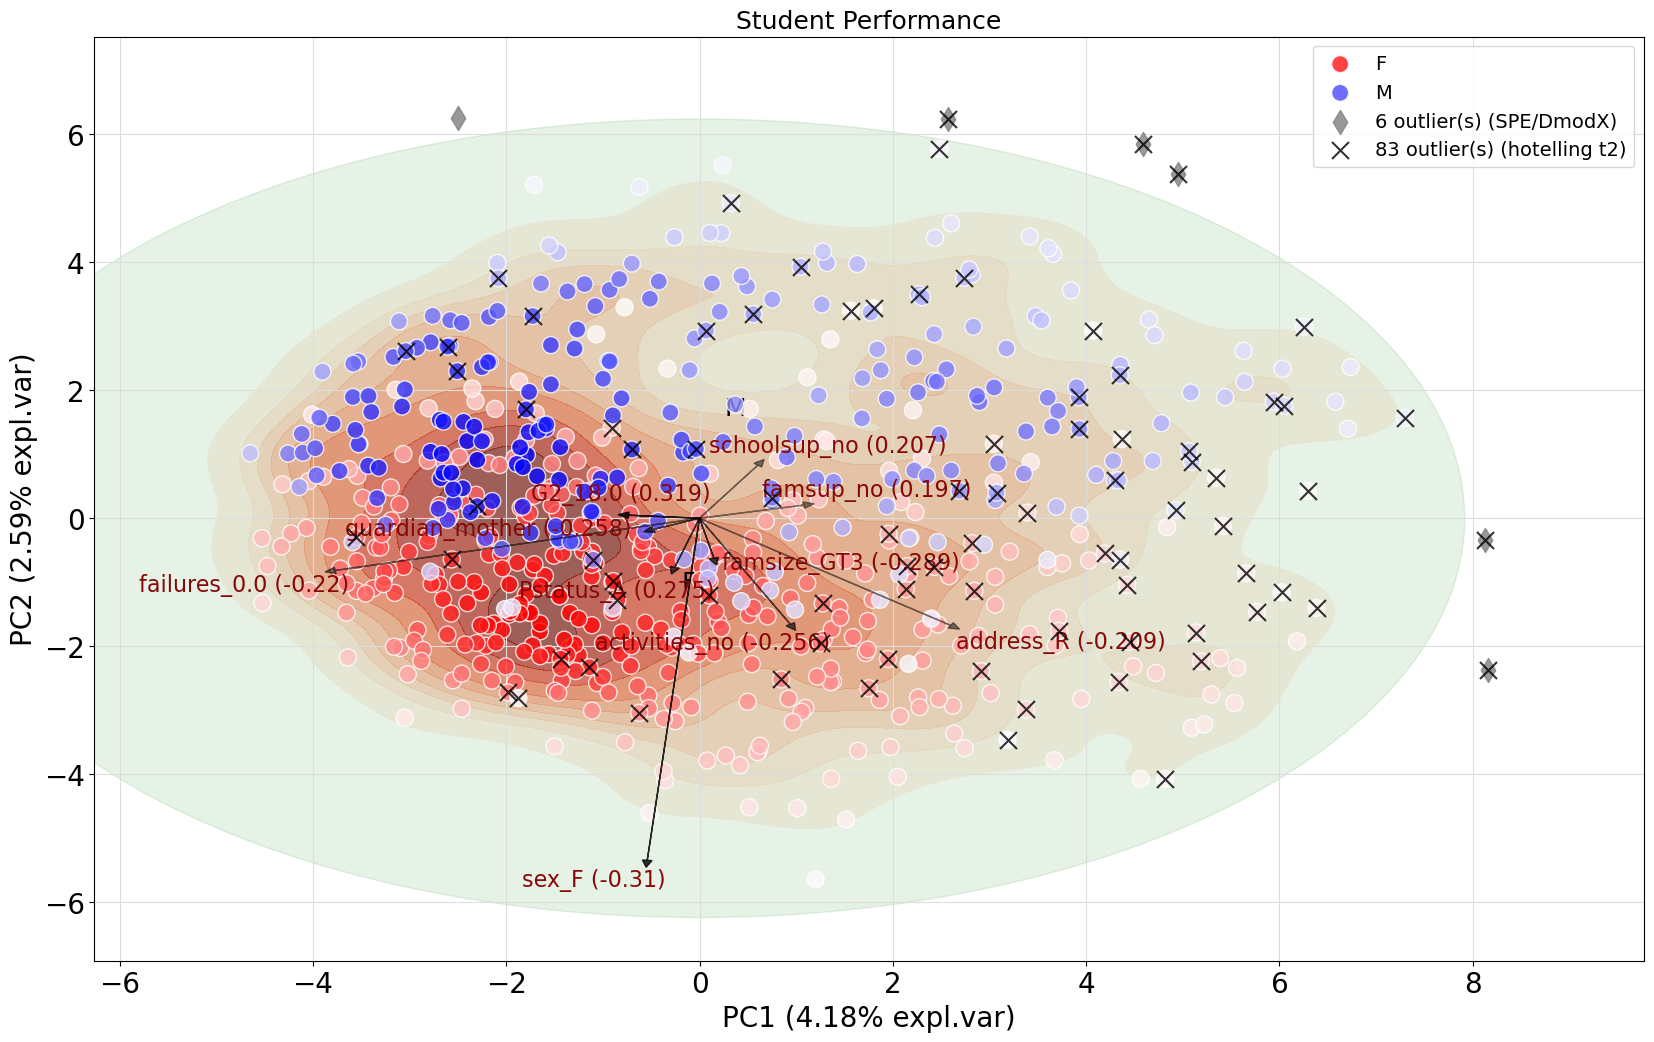

In [41]:
# Make biplot
model.biplot(SPE=True,
             HT2=True,
             n_feat=10,
             legend=True,
             labels=df['sex'],
             title='Student Performance',
             figsize=(20, 12),
             color_arrow='k',
             arrowdict={'fontsize':16, 'c':'k'},
             cmap='bwr_r',
             gradient='#FFFFFF',
             edgecolor='#FFFFFF',
             density=True,
             )

plt.savefig('Hotellings_SPE_2dplot_category.png', dpi=300, bbox_inches='tight')